In [179]:
import numpy as np
import math
import matplotlib.pyplot as plt
import shutil
import os

Разработать алгоритм моделирования нормально распреде-
ленного случайного вектора с заданными математическим
ожиданием и корреляционной матрицей.

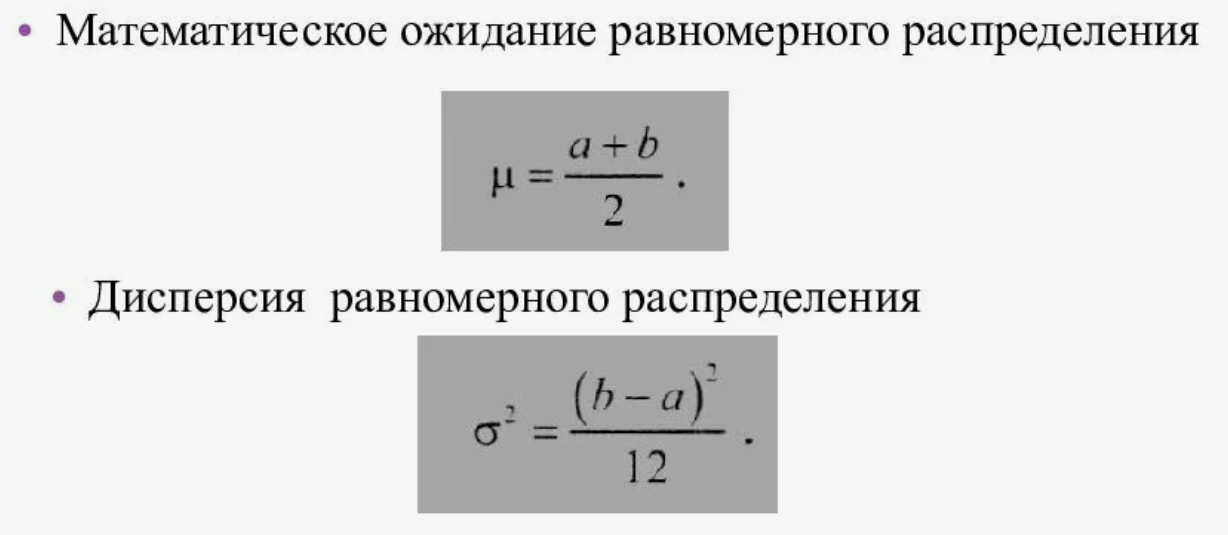

In [180]:
def GenerateRandomVectors(meanVector, covarianceMatrix, N, savedFileName):
    # Создание матрицы А для получения вектора X
    A = np.zeros((2,2))
    A[0,0] = math.sqrt(covarianceMatrix[0, 0])
    A[1,0] = covarianceMatrix[1, 0] / math.sqrt(covarianceMatrix[0, 0])
    A[1,1] = math.sqrt(covarianceMatrix[1, 1] - covarianceMatrix[0, 1] * covarianceMatrix[0, 1] / covarianceMatrix[0, 0])
    
    # Генерация N двухмерных векторов, каждый элемент из стандартного нормального распределения N(0,1)
    E = np.array([])
    for i in range(N):
        e = np.zeros((2, 1))
        n = 1000
        a = 0
        b = 1
        for i in range(n):
            uni = np.random.uniform(a, b, 2)
            e += uni.reshape(2,1)
        e = (e - n * 0.5) / np.sqrt(n / 12)
        E = np.append(E, e)
    #print(E)
    E = np.reshape(E, [2, N])
    
    # Генерация вектора X с сользованием матрицы МА и корреляционной матрицы
    #x = np.matmul(A, E) + np.repeat(meanVector, N, axis=1)
    x = np.dot(A, E) + meanVector
    
    np.save(savedFileName, x)
    if os.path.exists("./vectors/"+savedFileName + ".npy"):
        os.remove("./vectors/"+savedFileName + ".npy")
    shutil.move(savedFileName + ".npy", "./vectors")
    return x

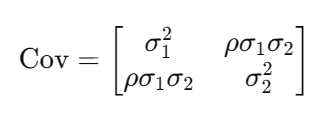

In [181]:
def CalculateCovarianceMatrix(sigma1, sigma2, rho):
    cov_matrix = np.array([[sigma1**2, rho*sigma1*sigma2],
                       [rho*sigma1*sigma2, sigma2**2]])
    print("Ковариационная матрица: \n", cov_matrix)
    return cov_matrix

Ковариационная матрица: 
 [[1.  0.8]
 [0.8 1. ]]


Text(0.5, 1.0, 'Выборка вектора X1 и X2')

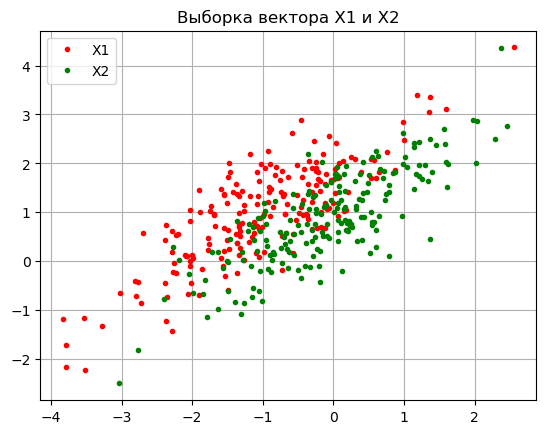

In [196]:
N = 200
M1 = np.array([[-1],[1]])  # МА вектора 1
M2 = np.array([[0],[1]])  # МА вектора 2
M3 = np.array([[1],[-1]])  # МА вектора 3
#B = np.array([[2, 2], [2, 3]])  # ковариационная матрица

B = CalculateCovarianceMatrix(1, 1, 0.8)

x1_1 = GenerateRandomVectors(M1, B, N, "x1_1")
x1_2 = GenerateRandomVectors(M2, B, N, "x1_2")

#fig, axes = plt.subplots(1, 1, figsize=(10, 4.5))

plt.plot(x1_1[0,:], x1_1[1,:], color='red', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x1_2[0,:], x1_2[1,:], color='green', marker='.', linestyle='none')  # plot saved and loaded data
plt.grid(True)
plt.legend(['X1', 'X2', 'X3'])
plt.title('Выборка вектора X1 и X2')

# axes[1].plot(x1_2[0,:], x1_2[1,:], color='green', marker='.', linestyle='none')  # plot saved and loaded data
# axes[1].grid(True)
# axes[1].set_title('Выборка вектора X2')

Ковариационная матрица: 
 [[ 1.  -0.8]
 [-0.8  1. ]]
Ковариационная матрица: 
 [[ 1.  -2.4]
 [-2.4  9. ]]
Ковариационная матрица: 
 [[9.  2.4]
 [2.4 1. ]]


Text(0.5, 1.0, 'Выборка векторов X1, X2, X3')

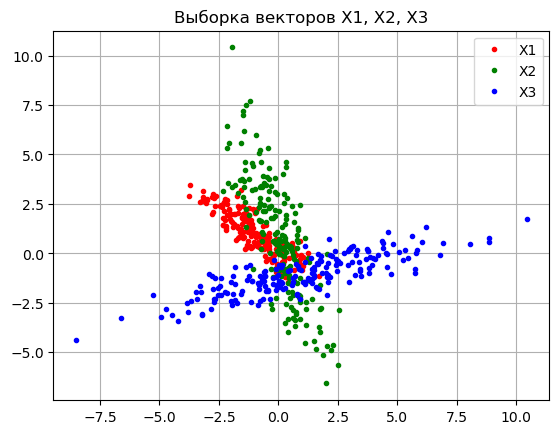

In [201]:
#B = np.array([[2, 2], [2, 3]])  # ковариационная матрица
B1 = CalculateCovarianceMatrix(-1, 1, 0.8)
B2 = CalculateCovarianceMatrix(1, -3, 0.8)
B3 = CalculateCovarianceMatrix(3, 1, 0.8)

x2_1 = GenerateRandomVectors(M1, B1, N, "x2_1")
x2_2 = GenerateRandomVectors(M2, B2, N, "x2_2")
x2_3 = GenerateRandomVectors(M3, B3, N, "x2_3")

#fig, axes = plt.subplots(1, 3, figsize=(19, 5))

plt.plot(x2_1[0,:], x2_1[1,:], color='red', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x2_2[0,:], x2_2[1,:], color='green', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x2_3[0,:], x2_3[1,:], color='blue', marker='.', linestyle='none')  # plot saved and loaded data
plt.grid(True)
plt.legend(['X1', 'X2', 'X3'])
plt.title('Выборка векторов X1, X2, X3')

# axes[1].plot(x2_2[0,:], x2_2[1,:], color='green', marker='.', linestyle='none')  # plot saved and loaded data
# axes[1].grid(True)
# axes[1].set_title('Выборка вектора X2')

# axes[2].plot(x2_3[0,:], x2_3[1,:], color='blue', marker='.', linestyle='none')  # plot saved and loaded data
# axes[2].grid(True)
# axes[2].set_title('Выборка вектора X3')

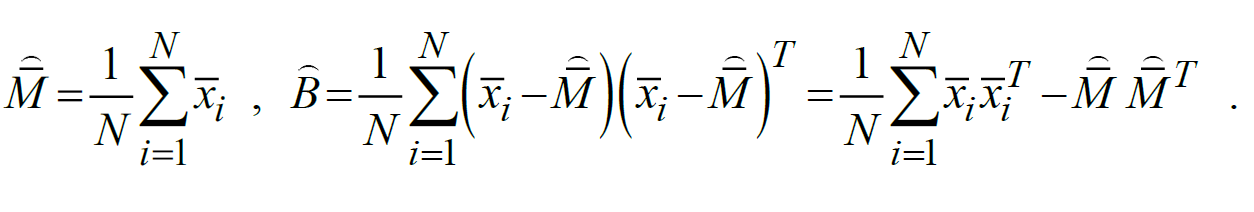

In [184]:
def CalculateParametrs(vector):
    vector_t = vector.T
    n = vector_t.shape[0]  # число наблюдений
    M_hat = 1/n*np.sum(vector_t, axis=0) #axis=0 - сумма компонентам вектора
    
    B_hat = np.zeros((vector_t.shape[1], vector_t.shape[1]))  # инициализация

    for i in range(n):
        B_hat += np.outer(vector_t[i], vector_t[i].T) - np.outer(M_hat, M_hat.T)

    B_hat /= n  # усреднение
    
    return M_hat, B_hat


In [185]:
def printParametrs(param, M, B, vectorName):
    from prettytable import PrettyTable
    print(f"\n----- {vectorName} -----\n")
    table_M = PrettyTable()
    table_M.field_names = ['Оценка математического ожидания вектора M', 'Эталонное значение']
    table_M.add_row([param[0], M])
    table_M.border = False  
    print(f"{table_M}\n")
    
    table_B = PrettyTable()
    table_B.field_names = ['Оценка ковариационной матрицы B', 'Эталонное значение']
    table_B.add_row([param[1], B])
    table_B.border = False  
    print(table_B)
    

In [186]:
printParametrs(CalculateParametrs(x1_1), M1, B,"X1_1")
printParametrs(CalculateParametrs(x1_2), M2, B, "X1_2")
printParametrs(CalculateParametrs(x2_1), M1, B1, "X2_1")
printParametrs(CalculateParametrs(x2_2), M2, B2, "X2_2")
printParametrs(CalculateParametrs(x2_3), M3, B3, "X2_3")



----- X1_1 -----

 Оценка математического ожидания вектора M  Эталонное значение 
         [-0.93400847  0.97013884]                [[-1]        
                                                   [ 1]]       

 Оценка ковариационной матрицы B  Эталонное значение 
     [[1.02874186 0.2120343 ]         [[1.  0.2]     
     [0.2120343  0.95222162]]         [0.2 1. ]]     

----- X1_2 -----

 Оценка математического ожидания вектора M  Эталонное значение 
      [3.94845393e-04 1.00028112e+00]              [[0]        
                                                   [1]]        

 Оценка ковариационной матрицы B  Эталонное значение 
     [[0.91806259 0.12330101]         [[1.  0.2]     
     [0.12330101 1.24675916]]         [0.2 1. ]]     

----- X2_1 -----

 Оценка математического ожидания вектора M  Эталонное значение 
         [-0.94491983  1.02855083]                [[-1]        
                                                   [ 1]]       

 Оценка ковариационной матрицы B  Эталон

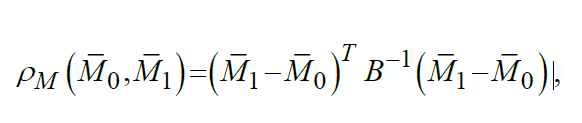

In [187]:
def Machalanobis(M1, M2, B):
    B_1 = np.linalg.inv(B)
    return (M1 - M2).T @ B_1 @ (M1 - M2)

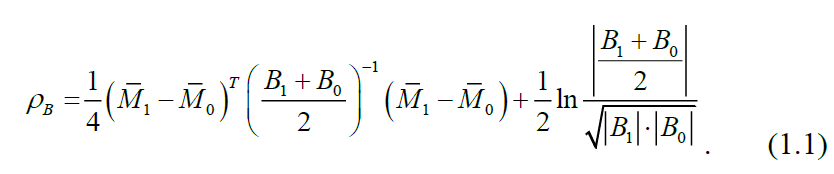

In [188]:
def Bhtacharii(M1, M2, B0, B1):
    B_01 = np.linalg.inv((B1 + B0) / 2)
    return 0.25 * (M1 - M2).T @ (M1 - M2) + 0.5 * np.log(np.linalg.det((B1 + B0) / 2) / math.sqrt(np.linalg.det(B1) * np.linalg.det(B0)))

In [189]:
distance_M = Machalanobis(M1, M2, B)[0][0]
print('Расстояние Махаланобиса:', distance_M)

distance_B12 = Bhtacharii(M1, M2, B1, B2)[0][0]
print('Расстояние Бхатачария для векторов 1 и 2:', distance_B12)
distance_B13 = Bhtacharii(M1, M3, B1, B3)[0][0]
print('Расстояние Бхатачария для векторов 1 и 3:', distance_B13)
distance_B23 = Bhtacharii(M3, M2, B3, B2)[0][0]
print('Расстояние Бхатачария для векторов 3 и 2:', distance_B23)

Расстояние Махаланобиса: 1.0416666666666667
Расстояние Бхатачария для векторов 1 и 2: 0.5932948900068931
Расстояние Бхатачария для векторов 1 и 3: 2.343294890006893
Расстояние Бхатачария для векторов 3 и 2: 2.000462748483622
